In [1]:
import numpy as np
import matplotlib.pyplot as plt

d = np.array([9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 4, 7, 8])
imp1 = np.array([112, 126, 129, 114, 108, 113, 101, 111, 109, 103, 95, 82, 103, 107])
imp2 = np.array([114, 167, 120, 139, 145, 133, 129, 112, 131, 149, 135, 122, 115, 114])
imp3 = np.array([124, 135, 152, 123, 107, 137, 115, 122, 117, 108, 110, 125, 118, 107])
imp = imp1+imp2+imp3
imp_err = np.sqrt(imp)
t = np.array([600, 600, 600, 600, 600, ])
print(imp)
print(imp_err)

[350 428 401 376 360 383 345 345 357 360 340 329 336 328]
[18.70828693 20.68816087 20.02498439 19.39071943 18.97366596 19.57038579
 18.57417562 18.57417562 18.89444363 18.97366596 18.43908891 18.13835715
 18.33030278 18.11077028]


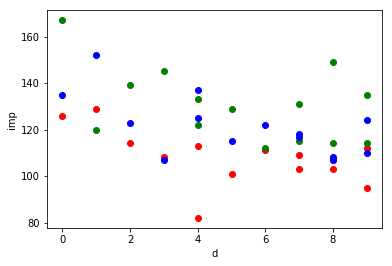

In [2]:
x = d
y1 = imp1
y2 = imp2
y3 = imp3
y = imp
# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(f, x, y)
# pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
# fit = np.polyfit(x, y, 2, cov=True)
# params = fit[0]
# cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
# params = np.array(popt)
# cov = np.array(pcov)
# print_fit(params, cov)
# plt.errorbar(x, y, xerr=2, fmt='o')
plt.xlabel('d')
plt.ylabel('imp')
plt.plot(x, y1, 'ro')
plt.plot(x, y2, 'go')
plt.plot(x, y3, 'bo')
# plt.plot(x, params[0]*x**2+params[1]*x+params[2])
plt.savefig('results_3.png', dpi=1000)
plt.show()

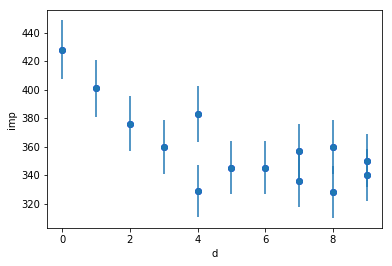

In [3]:
plt.errorbar(x, y, yerr=imp_err, fmt='o')
plt.xlabel('d')
plt.ylabel('imp')
plt.plot(x, y, 'bo')
plt.savefig('results_all.png', dpi=1000)
plt.show()

In [4]:
print(imp)

[350 428 401 376 360 383 345 345 357 360 340 329 336 328]


In [5]:
my_dict = dict()
for my_imp, my_d in list(zip(imp, d)):
    if my_d not in my_dict:
        my_dict[my_d] = []
    my_dict[my_d].append(my_imp)
print(my_dict)
for key in my_dict:
    print(key)
    my_dict[key] = np.mean(my_dict[key])
print(my_dict)

{9: [350, 340], 0: [428], 1: [401], 2: [376], 3: [360], 4: [383, 329], 5: [345], 6: [345], 7: [357, 336], 8: [360, 328]}
9
0
1
2
3
4
5
6
7
8
{9: 345.0, 0: 428.0, 1: 401.0, 2: 376.0, 3: 360.0, 4: 356.0, 5: 345.0, 6: 345.0, 7: 346.5, 8: 344.0}


In [6]:
x = []
y = []
for key in my_dict:
    x.append(key)
    y.append(my_dict[key])

x.append(x[0])
y.append(y[0])
x = np.array(x[1:])
y = np.array(y[1:])
y_err = np.sqrt(y)
imp_avg = y
d_avg = x

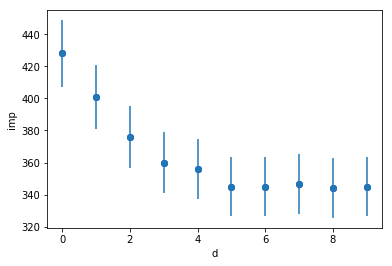

In [7]:
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.xlabel('d')
plt.ylabel('imp')
plt.plot(x, y, 'bo')
plt.savefig('results_avg.png', dpi=1000)
plt.show()

In [8]:
def fit_func(x, a, b, c):
    return c*np.exp(-x*1.9*11.34/a)+b

In [9]:
def print_fit(params, cov):
    names = ['a', 'b', 'c']
    names_cov = ['delta a', 'delta b', 'delta c']
    for i in range(len(params)):
        print('%s    %E    %s    %E' %(names[i], params[i], names_cov[i], cov[i]))

In [10]:
from scipy.optimize import curve_fit
print(x)
print(y)
popt, pcov = curve_fit(fit_func, x, y, p0 = [30, 345, 100])
pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))

[0 1 2 3 4 5 6 7 8 9]
[428.  401.  376.  360.  356.  345.  345.  346.5 344.  345. ]


a    4.540115E+01    delta a    4.166420E+00
b    3.413991E+02    delta b    2.073583E+00
c    8.862304E+01    delta c    3.191622E+00


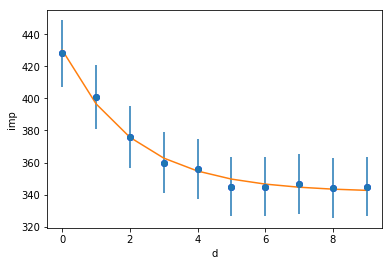

In [11]:
params = np.array(popt)
cov = np.array(pcov)
print_fit(params, cov)
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.xlabel('d')
plt.ylabel('imp')
plt.plot(x, y, 'bo')
plt.plot(x, fit_func(x, *params))
plt.savefig('results_fit.png', dpi=1000)
plt.show()

In [12]:
A = 207
my_lambda = 53.304195969719245
delta_my_lambda = 7.183538004389792
N_a = 6.02*10**23
sigma = A / (N_a * my_lambda)
delta_sigma = sigma * delta_my_lambda / my_lambda
print(sigma)
print(delta_sigma)

6.450783364096539e-24
8.693395822046952e-25


In [13]:
print(imp)
print(d)

[350 428 401 376 360 383 345 345 357 360 340 329 336 328]
[9 0 1 2 3 4 5 6 7 8 9 4 7 8]


In [14]:
print(imp_avg)
print(d_avg)
L_avg = d_avg * 1.9 * 11.34
print(L_avg)
E_avg = []

[428.  401.  376.  360.  356.  345.  345.  346.5 344.  345. ]
[0 1 2 3 4 5 6 7 8 9]
[  0.     21.546  43.092  64.638  86.184 107.73  129.276 150.822 172.368
 193.914]


In [15]:
dndlambda = [(y - x)/(1.9*11.34) for x, y, in list(zip(imp_avg, imp_avg[1:]))]

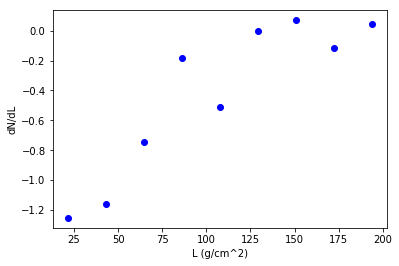

In [16]:
plt.plot(L_avg[1:], dndlambda, 'bo')
plt.xlabel('L (g/cm^2)')
plt.ylabel('dN/dL')
plt.savefig('results_diff_spectrum.png', dpi=1000)
plt.show()

In [17]:
x = []
y = []
for elem in np.load('result.npy'):
    x.append(elem[1]/10*11.34)
    y.append(elem[0])
plt.plot(x, y, 'o')
plt.xlabel('L, г/см^2')
plt.ylabel('E, МэВ')
plt.savefig('spectrum_final.png', dpi=1000)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'result.npy'